Aluno: Bruno Santos (bfss@cesar.school)

# Import do dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
from sklearn.cluster import KMeans
import math

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/country_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


# Tratamento de dados

In [ ]:
# Verificando a existência de valores nulos
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


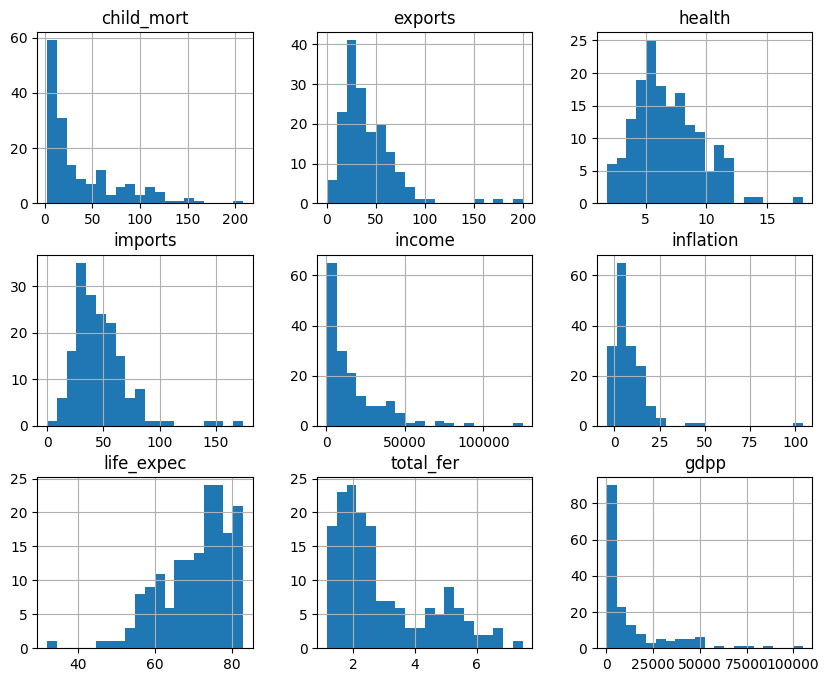

In [ ]:
# Histogramas de cada coluna
df.hist(figsize=(10, 8), bins=20)
plt.show()

Muitas colunas tem comportamento similares. Porém life_expec é invertida e total_fer é mais irregular.

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']] = scaler.fit_transform(
    df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
)


In [ ]:
df_normalized.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Criando dataframe numérico para ser usado na clustrerização
df_numerico = df_normalized.drop(columns=['country'])

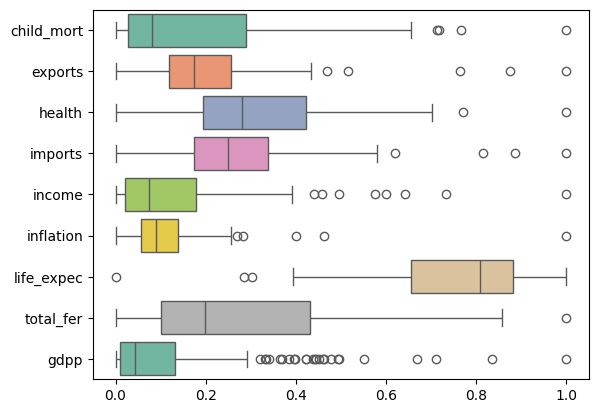

In [ ]:
# Verificação de outliers
sns.boxplot(data=df_normalized, orient="h", palette="Set2")
plt.show()

Optei por deixar. São interessantes.

Significado de cada coluna segundo https://wiki.datrics.ai/

country - Name of the country

child_mort - Death of children under 5 years of age, per 1000 live births

exports - Exports of goods and services, % of total GDP

health - Total health spending, % of total GDP

imports - Imports of goods and services, % of total GDP

income - Net income per capita, USD (receita líquida per capita)

inflation - The measurement of the annual growth rate of the total GDP

life_expec - The average number of years a newborn child would live if the current mortality patterns are to remain the same

total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp - The GDP per capita, USD ("PIB" per capita)


# Visualização dos dados

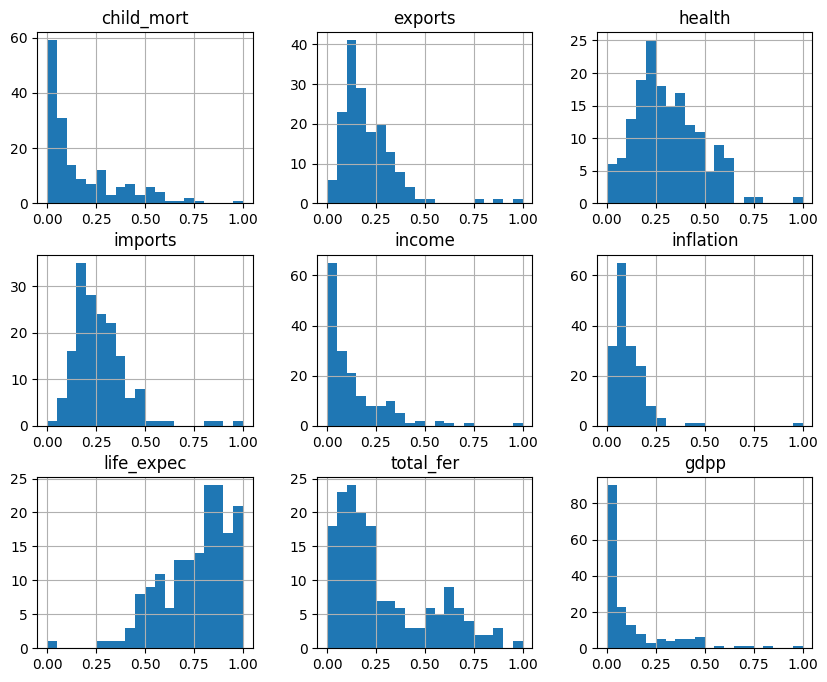

In [ ]:
# Histogramas de cada coluna
df_normalized.hist(figsize=(10, 8), bins=20)
plt.show()

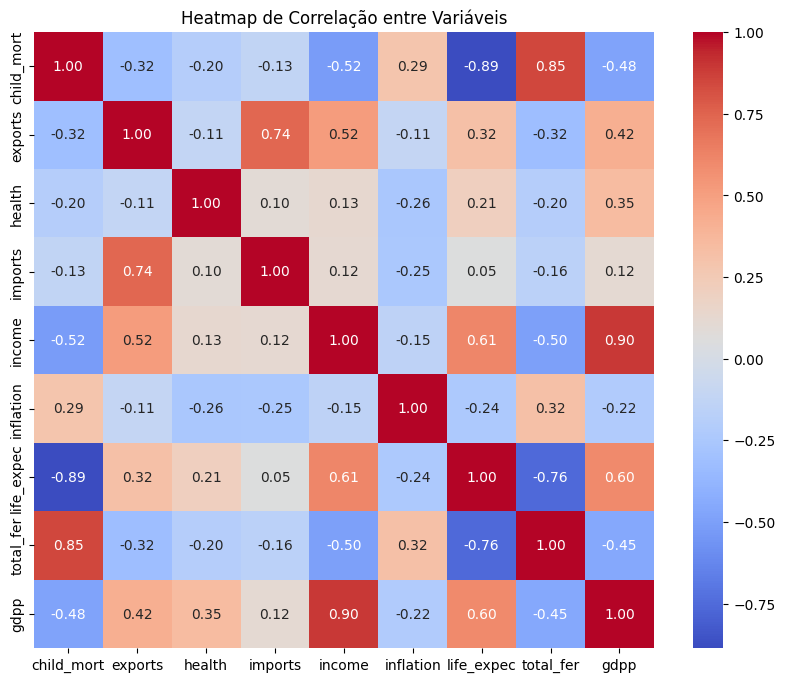

In [ ]:
# Calculando a matriz de correlação
corr_matrix = df_numerico.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()


Não há necessidade de ver os gráficos de income x gdpp por se tratarem de uma correlação óbvia.

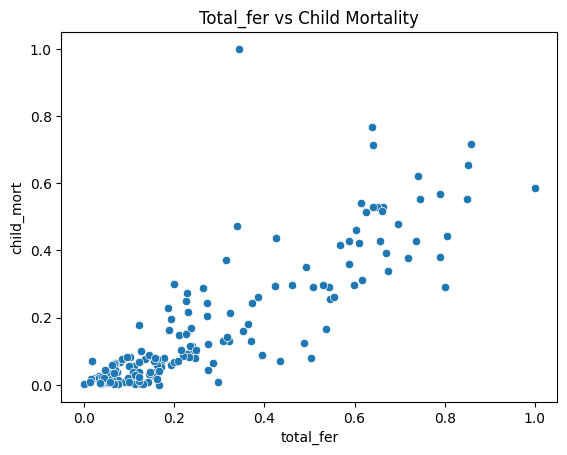

In [ ]:
# Scatter plot de total_fer (fertilidade) x mortalidade infantil
sns.scatterplot(x='total_fer', y='child_mort', data=df_normalized)
plt.title('Total_fer vs Child Mortality')
plt.show()

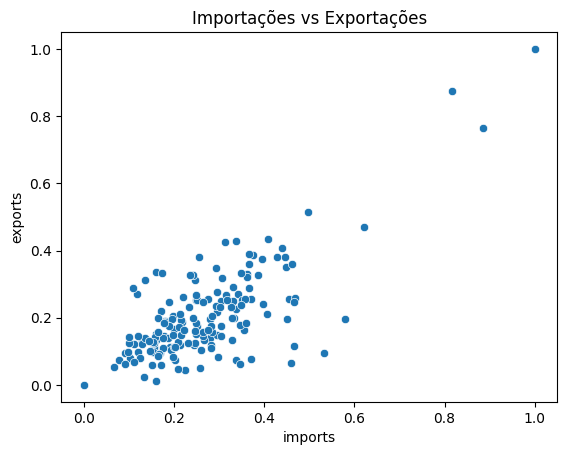

In [ ]:
sns.scatterplot(x='imports', y='exports', data=df_normalized)
plt.title('Importações vs Exportações')
plt.show()

A princípio pensei que seria uma reta negativa e uma correlação neagtiva, pois países importadores importam produtos finais enquanto exportadores (desenvolvidos) vendem esses produtos finais para subdesenvolvidos.
Porém, a matéria-prima vem geralmente desses países subdesenvolvidos.

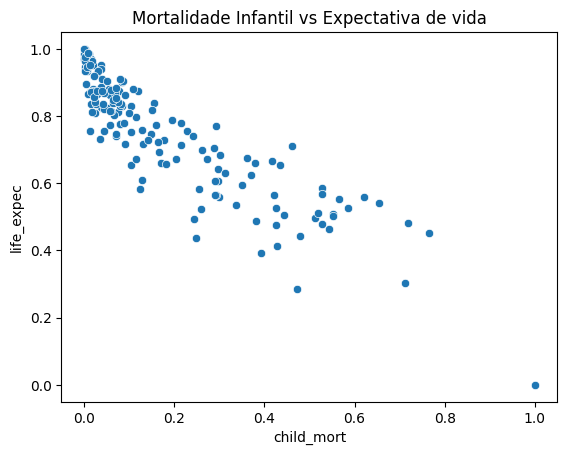

In [ ]:
sns.scatterplot(x='child_mort', y='life_expec', data=df_normalized)
plt.title('Mortalidade Infantil vs Expectativa de vida')
plt.show()

De fato, países com baixa mortalidade infantil tendem a ter uma maior expectativa de vida. Enquanto os com alta mortalidade infantil tem baixa expectativa de vida.

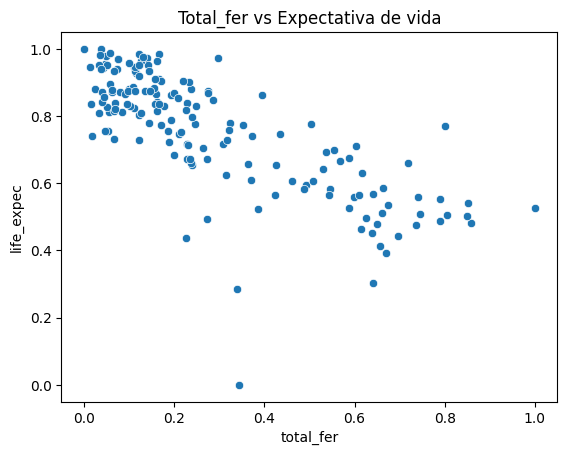

In [ ]:
sns.scatterplot(x='total_fer', y='life_expec', data=df_normalized)
plt.title('Total_fer vs Expectativa de vida')
plt.show()

Países com alta expectativa de vida tem uma total_fer menor. Países com baixa expectativa tem uma maior total_fer.

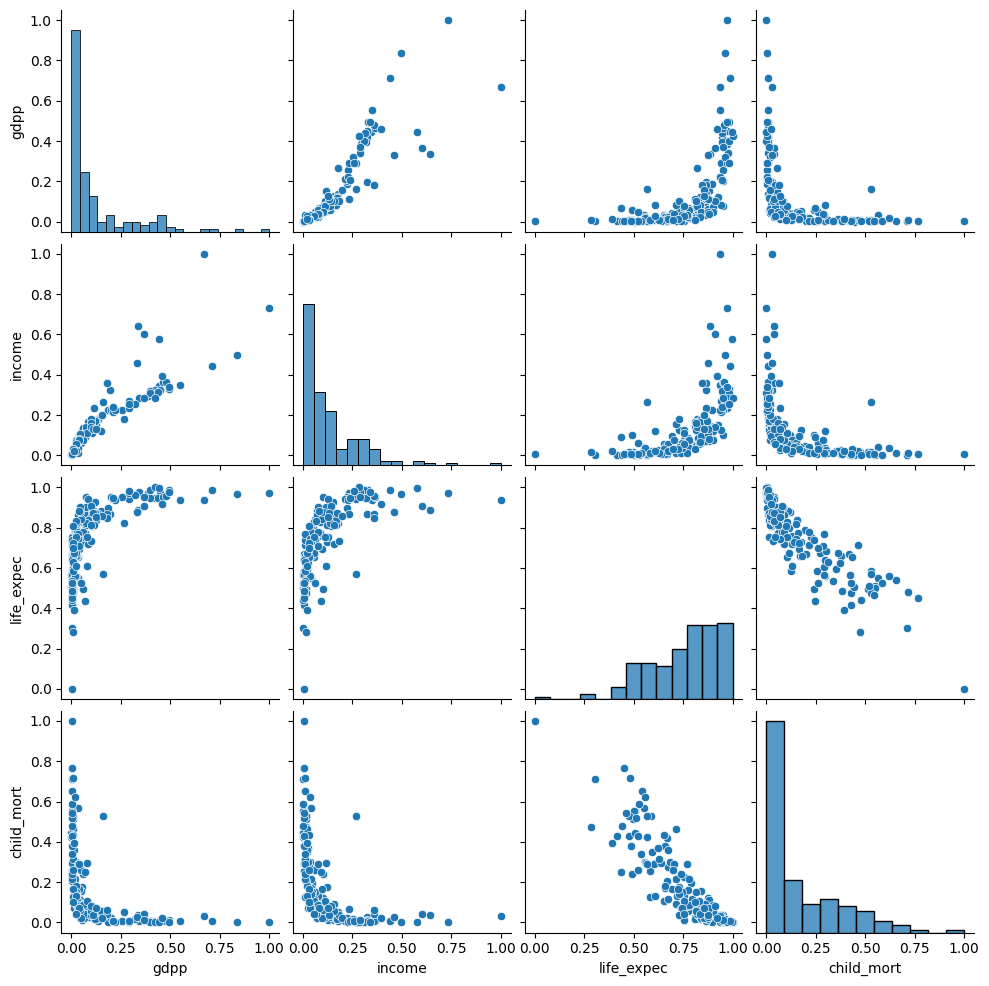

In [ ]:
sns.pairplot(df_normalized[['gdpp', 'income', 'life_expec', 'child_mort']])
plt.show()

In [ ]:
df_normalized.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


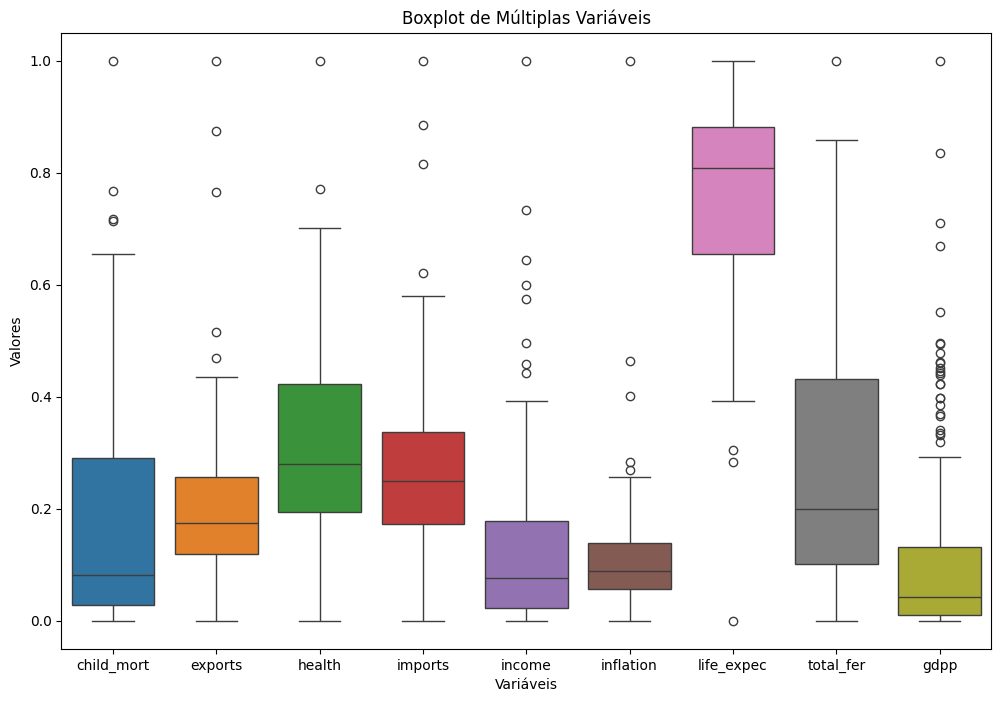

In [ ]:
# Variáveis para o boxplot
var_boxplot = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Criando o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized[var_boxplot])
plt.title('Boxplot de Múltiplas Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.show()


# Clusterização

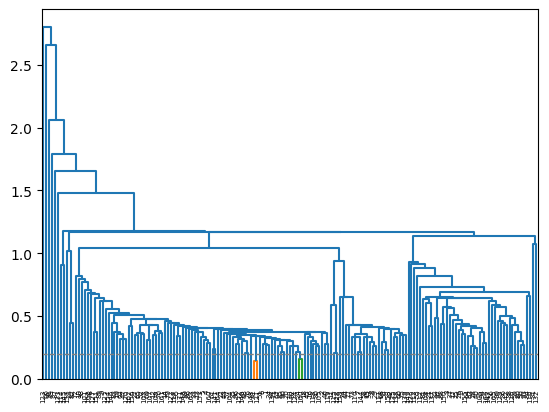

In [ ]:
# calcaulando a distância entre cada amostra
Z = single(df_numerico)
tr = 0.2
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=tr, labels=df.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

São muitos dados, dendograma não vai ficar muito bom.
Usarei K means.

## K Means

Através da análise dos gráficos, será levada em consideração as variáveis de gdpp, income, life_expec, child_mort e total_fer.

In [ ]:
scaler = StandardScaler()
print(scaler.fit(df_numerico[['gdpp', 'income', 'life_expec', 'child_mort', 'total_fer']].values))
print(scaler.mean_)
print(scaler.transform(df_numerico[['gdpp', 'income', 'life_expec', 'child_mort', 'total_fer']].values))

df_numerico[['gdpp_std', 'income_std', 'life_expec_std', 'child_mort_std', 'total_fer_std']] = scaler.transform(df_numerico[['gdpp', 'income', 'life_expec', 'child_mort', 'total_fer']].values)
features = ['gdpp_std', 'income_std', 'life_expec_std', 'child_mort_std', 'total_fer_std']


StandardScaler()
[0.12153553 0.13293316 0.75849484 0.17366144 0.28359055]
[[-6.79179609e-01 -8.08245403e-01 -1.61909203e+00  1.29153238e+00
   1.90288227e+00]
 [-4.85623236e-01 -3.75368896e-01  6.47866431e-01 -5.38948897e-01
  -8.59972814e-01]
 [-4.65375609e-01 -2.20844469e-01  6.70423231e-01 -2.72832734e-01
  -3.84043958e-02]
 [-5.16268293e-01 -5.85043454e-01 -1.17923442e+00  2.00780766e+00
   2.12815103e+00]
 [-4.18171341e-02  1.01731774e-01  7.04258432e-01 -6.95634115e-01
  -5.41946330e-01]
 [-1.45791437e-01  8.09204035e-02  5.91474429e-01 -5.91177303e-01
  -3.82933087e-01]
 [-5.33232522e-01 -5.43420713e-01  3.09514422e-01 -5.01642893e-01
  -8.33470607e-01]
 [ 2.13069856e+00  1.26196568e+00  1.29073525e+00 -8.32422797e-01
  -6.74457365e-01]
 [ 1.85708197e+00  1.35561685e+00  1.12155924e+00 -8.44858132e-01
  -9.99109401e-01]
 [-3.89857431e-01 -5.95563477e-02 -1.64178390e-01  2.31282334e-02
  -6.81082917e-01]
 [ 8.22811276e-01  2.99439794e-01  3.65906423e-01 -6.08586772e-01
  -7.20836

In [ ]:
# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_numerico[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

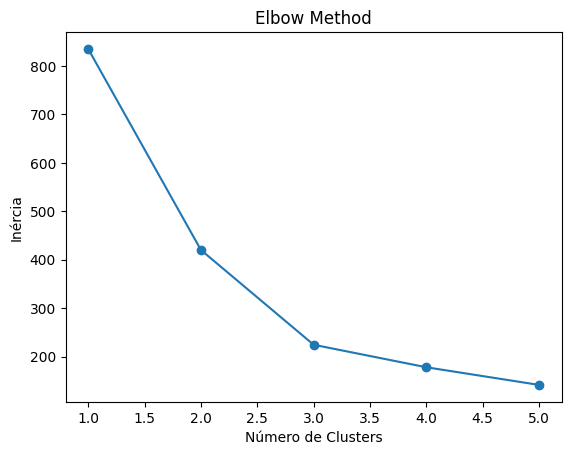

In [ ]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

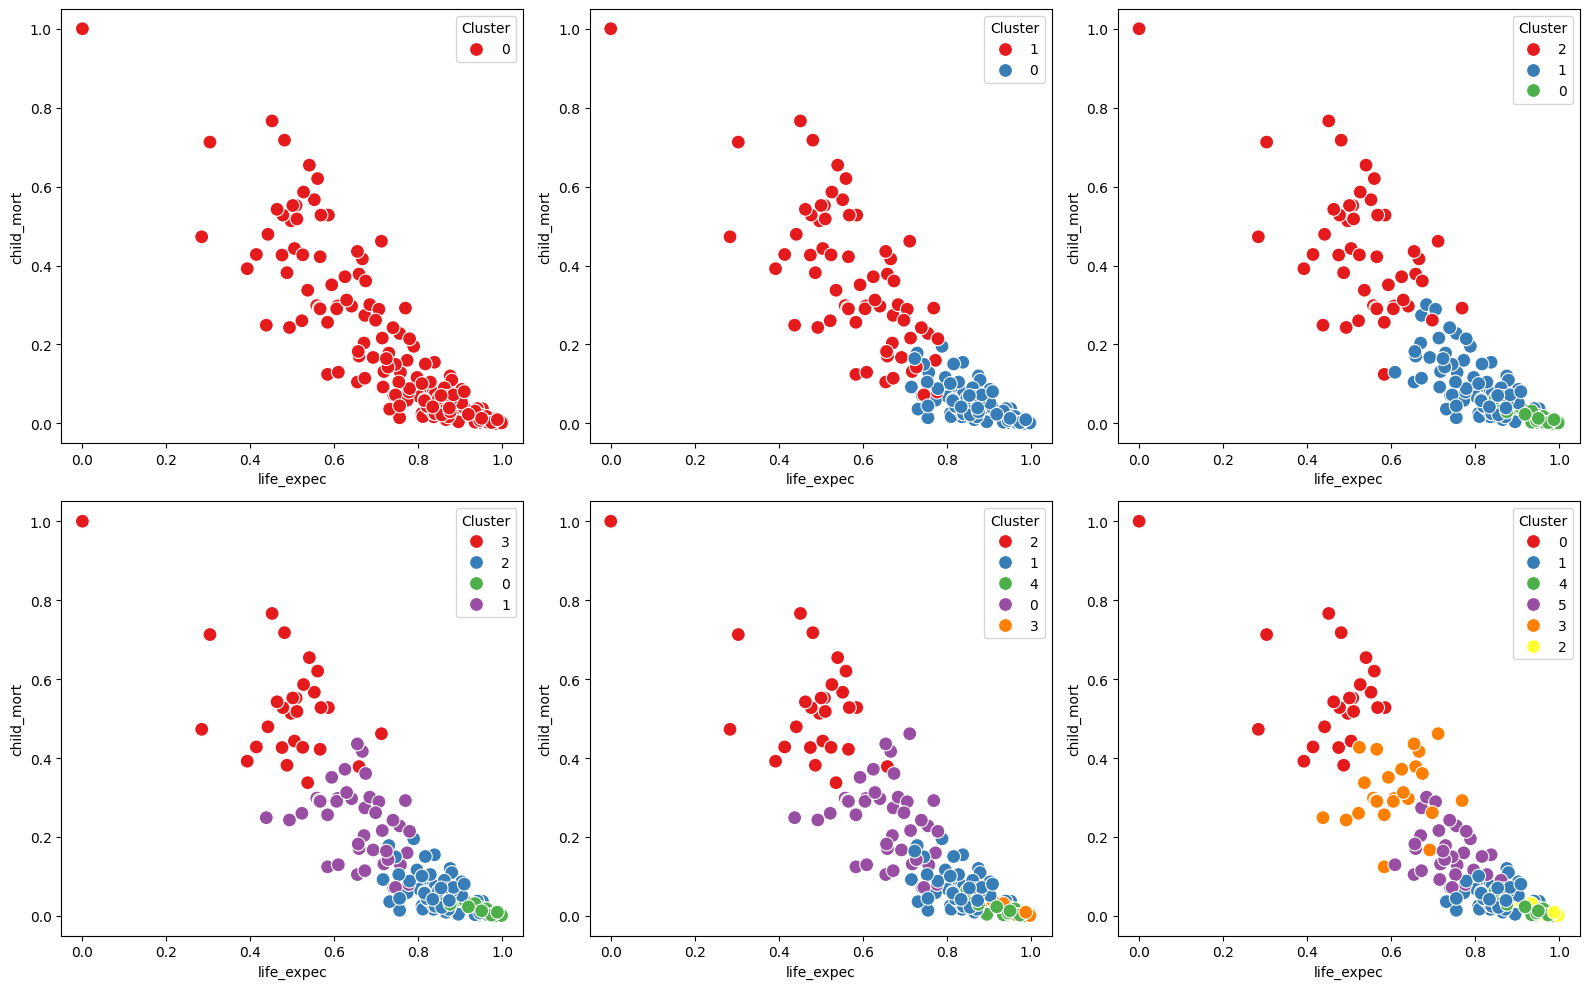

In [ ]:
# Aplicando o Kmeans de 2 a 6 clusteres
# Definindo o número máximo de clusters
num_clusters = 6

# Calculando o número de linhas e colunas
cols = 3
rows = math.ceil(num_clusters / cols)

# Criando o grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop para cada quantidade de clusters
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Aplicando K-means para a quantidade atual de clusters (K)
    kmeans = KMeans(n_clusters=k, random_state=0)
    df_numerico['Cluster'] = kmeans.fit_predict(df_numerico[features])
    df_numerico['Cluster'] = df_numerico['Cluster'].astype(str)

    # Scatter plot dos dados coloridos
    ax = sns.scatterplot(ax=axes[row, col], data=df_numerico, s=100, x='life_expec', y='child_mort', hue='Cluster', palette='Set1')


# Ajustando layout e plotando
plt.tight_layout()
plt.show()

Apesar de mais clusters significar filtrar melhor os países com alta mortalidade infantil e baixa expectativa de vida, seguirei o valor encontrado no Elbow Method pois os valores médios de expectativa de vida e mortalidade infantil já são significativos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


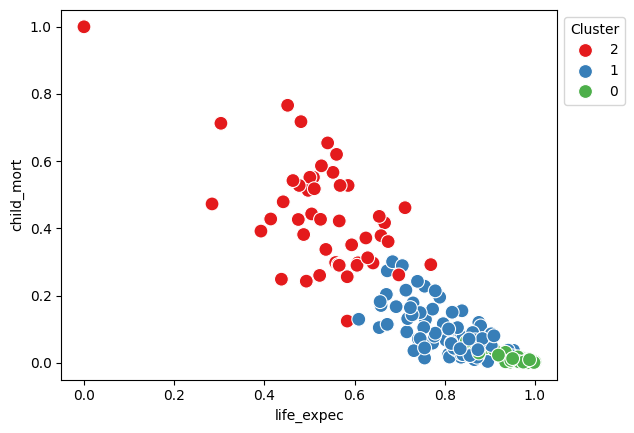

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=3, random_state=0)
df_numerico['Cluster'] = kmeans.fit_predict(df_numerico[features])
df_numerico['Cluster'] = df_numerico['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df_numerico, s=100, x='life_expec', y='child_mort', hue='Cluster', palette='Set1')
#ax.set_xlim(1, 12)
#ax.set_ylim(1, 10)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Análise dos Clusters

In [ ]:
# Verificar as características médias de cada cluster
cluster_summary = df_numerico.groupby('Cluster').mean()
print(cluster_summary)

# Verificar quais países estão em cada cluster
for cluster in df_numerico['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df_numerico[df_numerico['Cluster'] == cluster][['child_mort', 'income', 'gdpp', 'total_fer', 'life_expec']])


         child_mort   exports    health   imports    income  inflation  \
Cluster                                                                  
0          0.014019  0.279710  0.413629  0.269466  0.379542   0.073000   
1          0.091755  0.207736  0.284981  0.280305  0.094462   0.105421   
2          0.439019  0.146344  0.284741  0.248713  0.024930   0.148058   

         life_expec  total_fer      gdpp  gdpp_std  income_std  \
Cluster                                                          
0          0.946339   0.112127  0.415633  1.686152    1.596019   
1          0.808036   0.174382  0.063218 -0.334350   -0.248982   
2          0.531957   0.607457  0.015492 -0.607980   -0.698982   

         life_expec_std  child_mort_std  total_fer_std  
Cluster                                                 
0              1.074124       -0.815525      -0.720252  
1              0.283286       -0.418413      -0.458742  
2             -1.295378        1.355561       1.360433  

Cluster 2:
 

In [ ]:
# Analisando o df, a linha 66 possui a expectativa de vida zero e a mortaldiade infantil 1, quis ver os dados originais desse caso
# Obter a linha 66
linha_66 = df_normalized.iloc[66]

# Exibir os dados da linha 66
print(linha_66)

country          Haiti
child_mort         1.0
exports       0.075996
health        0.316967
imports       0.371601
income        0.007163
inflation     0.089271
life_expec         0.0
total_fer     0.343849
gdpp          0.004114
Name: 66, dtype: object


# Classificação dos Países

Os países que precisam de mais ajuda, analisando as principais variáveis com maior correlação, são os do cluster 2, que possuem uma maior taxa de mortalidade infantil e menor expectativa de vida.

Em especial o Haiti, com maior mortalidade infantil e menor expectativa de vida.

In [ ]:
# Lista de índices dos países desejados
linhas_desejadas = [0, 3, 17, 21, 25, 26, 28, 31, 32, 36, 37, 38, 40, 49, 50, 55, 56,
                    59, 63, 64, 66, 80, 81, 84, 87, 88, 93, 94, 97, 99, 106, 108, 112,
                    113, 116, 126, 129, 132, 136, 137, 142, 147, 149, 150, 155, 165, 166]

# Selecionando as colunas desejadas
colunas_desejadas = ['country', 'child_mort', 'income', 'gdpp', 'life_expec']

# Extraindo os dados das linhas e colunas especificadas
paises_necessitados = df.loc[linhas_desejadas, colunas_desejadas].reset_index(drop=True)

# Lista de países necessitados
print(paises_necessitados)

                     country  child_mort  income   gdpp  life_expec
0                Afghanistan        90.2    1610    553        56.2
1                     Angola       119.0    5900   3530        60.1
2                      Benin       111.0    1820    758        61.8
3                   Botswana        52.5   13300   6350        57.1
4               Burkina Faso       116.0    1430    575        57.9
5                    Burundi        93.6     764    231        57.7
6                   Cameroon       108.0    2660   1310        57.3
7   Central African Republic       149.0     888    446        47.5
8                       Chad       150.0    1930    897        56.5
9                    Comoros        88.2    1410    769        65.9
10          Congo, Dem. Rep.       116.0     609    334        57.5
11               Congo, Rep.        63.9    5190   2740        60.4
12             Cote d'Ivoire       111.0    2690   1220        56.3
13         Equatorial Guinea       111.0   33700

A forma de distribuição de renda ou prioridade pode ser através de maior mortalidade infantil, ou menor gdpp, ou menor expectativa de vida...

In [ ]:
# 10 países com maior mortalidade infantil
print(paises_necessitados.nlargest(10, 'child_mort'))

                     country  child_mort  income  gdpp  life_expec
20                     Haiti       208.0    1500   662        32.1
37              Sierra Leone       160.0    1220   399        55.0
8                       Chad       150.0    1930   897        56.5
7   Central African Republic       149.0     888   446        47.5
28                      Mali       137.0    1870   708        59.5
33                   Nigeria       130.0    5150  2330        60.5
32                     Niger       123.0     814   348        58.8
1                     Angola       119.0    5900  3530        60.1
4               Burkina Faso       116.0    1430   575        57.9
10          Congo, Dem. Rep.       116.0     609   334        57.5


In [ ]:
# 10 países com menor expectativa de vida
print(paises_necessitados.nsmallest(10, 'gdpp'))

                     country  child_mort  income  gdpp  life_expec
5                    Burundi        93.6     764   231        57.7
25                   Liberia        89.3     700   327        60.8
10          Congo, Dem. Rep.       116.0     609   334        57.5
32                     Niger       123.0     814   348        58.8
37              Sierra Leone       160.0    1220   399        55.0
26                Madagascar        62.2    1390   413        60.8
30                Mozambique       101.0     918   419        54.5
7   Central African Republic       149.0     888   446        47.5
27                    Malawi        90.5    1030   459        53.1
14                   Eritrea        55.2    1420   482        61.7


In [ ]:
# 10 países com menor income
print(paises_necessitados.nsmallest(10, 'income'))

                     country  child_mort  income  gdpp  life_expec
10          Congo, Dem. Rep.       116.0     609   334        57.5
25                   Liberia        89.3     700   327        60.8
5                    Burundi        93.6     764   231        57.7
32                     Niger       123.0     814   348        58.8
7   Central African Republic       149.0     888   446        47.5
30                Mozambique       101.0     918   419        54.5
27                    Malawi        90.5    1030   459        53.1
18                    Guinea       109.0    1190   648        58.0
43                      Togo        90.3    1210   488        58.7
37              Sierra Leone       160.0    1220   399        55.0


In [ ]:
# 10 países com menor expectativa de vida
print(paises_necessitados.nsmallest(10, 'life_expec'))

                     country  child_mort  income  gdpp  life_expec
20                     Haiti       208.0    1500   662        32.1
24                   Lesotho        99.7    2380  1170        46.5
7   Central African Republic       149.0     888   446        47.5
46                    Zambia        83.1    3280  1460        52.0
27                    Malawi        90.5    1030   459        53.1
39              South Africa        53.7   12000  7280        54.3
30                Mozambique       101.0     918   419        54.5
37              Sierra Leone       160.0    1220   399        55.0
19             Guinea-Bissau       114.0    1390   547        55.6
0                Afghanistan        90.2    1610   553        56.2
